# Lab 5: Softmax Regression

The purpose of this lab is to run the provided *jupyter notebook* with a different dataset, originated from [this](http://archive.ics.uci.edu/ml/datasets.html) repository. Since we want to apply a *multi-class classification*, we chose the **[Wine](http://archive.ics.uci.edu/ml/datasets/Wine)** dataset.

This dataset contains 178 instances of 13 attributes/constituents each, for **three** different types of wine. We present below the list of all the attributes/features:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

For this lab, we are going to classify the wines based on a subset of these attribues. We start by setting up the environement:

In [1]:
%matplotlib inline

In [2]:
!pip install mlxtend

Now, let's read the data from the *wine.data.txt* file:

In [3]:
import numpy as np

## Wine database row format:
# label, attr1, attr2, ..., attr13
wine_data = np.genfromtxt('wine.data.txt', delimiter=',')

## derive array 'X' and label vector 'y'
wine_X = wine_data[:, 1:]
wine_y = wine_data[:, 0].astype(int) - 1

# decrement by 1 to have classes 0, 1, 2 (instead of 1, 2, 3)

## Verify
print(f'The Wine dataset consists of {len(wine_X)} points of {len(wine_X[0])} attributes each')

The Wine dataset consists of 178 points of 13 attributes each


## Softmax Regression Algorithm

*Softmax Regression* (synonyms: *Multinomial Logistic*, *Maximum Entropy Classifier*, or just *Multi-class Logistic Regression*) is a generalization of logistic regression that we can use for multi-class classification (under the assumption that the classes are  mutually exclusive). In contrast, we use the (standard) *Logistic Regression* model in binary classification tasks.

Below is a schematic of a *Logistic Regression* model that we discussed in Chapter 3.

In *Softmax Regression* (SMR), we replace the sigmoid logistic function by the so-called *softmax* function $\phi_{softmax}(\cdot)$.

$$P(y=j \mid z^{(i)}) = \phi_{softmax}(z^{(i)}) = \frac{e^{z^{(i)}}}{\sum_{j=0}^{k} e^{z_{k}^{(i)}}},$$

where we define the net input *z* as 

$$z = w_1x_1 + ... + w_mx_m  + b= \sum_{l=0}^{m} w_l x_l + b= \mathbf{w}^T\mathbf{x} + b.$$ 

(**w** is the weight vector, $\mathbf{x}$ is the feature vector of 1 training sample, and $b$ is the bias unit.)   
Now, this softmax function computes the probability that this training sample $\mathbf{x}^{(i)}$ belongs to class $j$ given the weight and net input $z^{(i)}$. So, we compute the probability $p(y = j \mid \mathbf{x^{(i)}; w}_j)$ for each class label in  $j = 1, \ldots, k.$. Note the normalization term in the denominator which causes these class probabilities to sum up to one.

To illustrate the concept of softmax, let's work on a concrete example. We pick 4 random samples from the 3 different wine classes (0, 1, 2) from our dataset:

- $x_0 \rightarrow \text{class }0$
- $x_1 \rightarrow \text{class }2$
- $x_2 \rightarrow \text{class }0$
- $x_3 \rightarrow \text{class }1$

In [4]:
# random samples
samples_idx = [32, 149, 52, 98]

# construct the (test) y array
y = np.array([ wine_y[idx] for idx in samples_idx])
for i, _class in enumerate(y):
    print(f'x{i} -> class {_class}')

x0 -> class 0
x1 -> class 2
x2 -> class 0
x3 -> class 1


First, we want to encode the class labels into a format that we can more easily work with; we apply one-hot encoding:

In [5]:
y_enc = (np.arange(np.max(y) + 1) == y[:, None]).astype(float)
print('one-hot encoding:\n', y_enc)

one-hot encoding:
 [[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]


A sample that belongs to class 0 (the first row) has a 1 in the first cell, a sample that belongs to class 2 has a 1 in the second cell of its row, and so forth.

Next, we use the feature matrix of our 4 training samples. Because our dataset consists of 13 features/attributes we create a $4 \times 13$ matrix. Similarly, we create a $13 \times 3$ dimensional weight matrix (one **row** per feature/attribute and one **column** for each class)

In [6]:
# features for our "random" samples
X = wine_X[ [_ for _ in samples_idx], :]

# "random" weights; same for each class
w = [0.0099, 0.0101, 0.0100]
W = np.array([ w for _ in range(13) ])

bias = np.array([0.01, 0.1, 0.1])

print('Inputs X:\n', X)
print('\nWeights W:\n', W)
print('\nbias:\n', bias)

Inputs X:
 [[  1.36800000e+01   1.83000000e+00   2.36000000e+00   1.72000000e+01
    1.04000000e+02   2.42000000e+00   2.69000000e+00   4.20000000e-01
    1.97000000e+00   3.84000000e+00   1.23000000e+00   2.87000000e+00
    9.90000000e+02]
 [  1.30800000e+01   3.90000000e+00   2.36000000e+00   2.15000000e+01
    1.13000000e+02   1.41000000e+00   1.39000000e+00   3.40000000e-01
    1.14000000e+00   9.40000000e+00   5.70000000e-01   1.33000000e+00
    5.50000000e+02]
 [  1.38200000e+01   1.75000000e+00   2.42000000e+00   1.40000000e+01
    1.11000000e+02   3.88000000e+00   3.74000000e+00   3.20000000e-01
    1.87000000e+00   7.05000000e+00   1.01000000e+00   3.26000000e+00
    1.19000000e+03]
 [  1.23700000e+01   1.07000000e+00   2.10000000e+00   1.85000000e+01
    8.80000000e+01   3.52000000e+00   3.75000000e+00   2.40000000e-01
    1.95000000e+00   4.50000000e+00   1.04000000e+00   2.77000000e+00
    6.60000000e+02]]

Weights W:
 [[ 0.0099  0.0101  0.01  ]
 [ 0.0099  0.0101  0.01  ]
 

To compute the net input, we multiply the $4 \times 13$ matrix feature matrix `X` with the $13 \times 3$ (n_features x n_classes) weight matrix `W`, which yields a $4 \times 3$ output matrix (n_samples x n_classes) to which we then add the bias unit: 

$$\mathbf{Z} = \mathbf{X}\mathbf{W} + \mathbf{b}.$$

In [7]:
def net_input(X, W, b):
    return (X.dot(W) + b)

net_in = net_input(X, W, bias)
print('net input:\n', net_in)

net input:
 [[ 11.340649  11.659551  11.5451  ]
 [  7.132258   7.366142   7.2942  ]
 [ 13.415788  13.776612  13.6412  ]
 [  7.928119   8.178081   8.0981  ]]


Now, it's time to compute the softmax activation:

$$P(y=j \mid z^{(i)}) = \phi_{softmax}(z^{(i)}) = \frac{e^{z^{(i)}}}{\sum_{j=0}^{k} e^{z_{k}^{(i)}}}.$$

In [8]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

smax = softmax(net_in)
print('softmax:\n', smax)

softmax:
 [[ 0.27758749  0.38185393  0.34055858]
 [ 0.29075769  0.36737173  0.34187058]
 [ 0.27119749  0.38903577  0.33976673]
 [ 0.288246    0.37010112  0.34165288]]


As we can see, the values for each sample (row) nicely sum up to 1 now. For example we can say that the first sample   
`[ 0.27758749  0.38185393  0.34055858]` has a $27.76\%$ probability to belong to class 0, $38.19\%$ probability to belong to class 1 and $34.06\%$ probability to belong to class 2.



Now, in order to turn these probabilities back into class labels, we could simply take the argmax-index position of each row:

[[ 0.27758749  **0.38185393**  0.34055858]  -> 1 <br></br>
[  0.29075769  **0.36737173**  0.34187058]  -> 1 <br></br>
[  0.27119749  **0.38903577**  0.33976673]  -> 1 <br></br>
[  0.288246    **0.37010112**  0.34165288]] -> 1 <br></br>

In [9]:
def to_classlabel(z):
    return z.argmax(axis=1)

print('predicted class labels: ', to_classlabel(smax))

predicted class labels:  [1 1 1 1]


As we can see, our predictions are wrong, since the correct class labels are `[0, 2, 0, 1]`. Now, in order to train our logistic model we use the cross-entropy function (described in the other notebook):

Here the $T$ stands for "target" (i.e., the *true* class labels) and the $O$ stands for output -- the computed *probability* via softmax; **not** the predicted class label.

In [10]:
def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

xent = cross_entropy(smax, y_enc)
print('Cross Entropy:', xent)

Cross Entropy: [ 1.28161912  1.07332304  1.30490797  0.99397901]


In [11]:
def cost(output, y_target):
    return np.mean(cross_entropy(output, y_target))

J_cost = cost(smax, y_enc)
print('Cost: ', J_cost)

Cost:  1.16345728854


# SoftmaxRegression Code

We use the *SoftmaxRegression* class provided in the given notebook:

In [12]:
# Sebastian Raschka 2016
# Implementation of the mulitnomial logistic regression algorithm for
# classification.

# Author: Sebastian Raschka <sebastianraschka.com>
#
# License: BSD 3 clause

import numpy as np
from time import time
#from .._base import _BaseClassifier
#from .._base import _BaseMultiClass


class SoftmaxRegression(object):

    """Softmax regression classifier.

    Parameters
    ------------
    eta : float (default: 0.01)
        Learning rate (between 0.0 and 1.0)
    epochs : int (default: 50)
        Passes over the training dataset.
        Prior to each epoch, the dataset is shuffled
        if `minibatches > 1` to prevent cycles in stochastic gradient descent.
    l2 : float
        Regularization parameter for L2 regularization.
        No regularization if l2=0.0.
    minibatches : int (default: 1)
        The number of minibatches for gradient-based optimization.
        If 1: Gradient Descent learning
        If len(y): Stochastic Gradient Descent (SGD) online learning
        If 1 < minibatches < len(y): SGD Minibatch learning
    n_classes : int (default: None)
        A positive integer to declare the number of class labels
        if not all class labels are present in a partial training set.
        Gets the number of class labels automatically if None.
    random_seed : int (default: None)
        Set random state for shuffling and initializing the weights.

    Attributes
    -----------
    w_ : 2d-array, shape={n_features, 1}
      Model weights after fitting.
    b_ : 1d-array, shape={1,}
      Bias unit after fitting.
    cost_ : list
        List of floats, the average cross_entropy for each epoch.

    """
    def __init__(self, eta=0.01, epochs=50,
                 l2=0.0,
                 minibatches=1,
                 n_classes=None,
                 random_seed=None):

        self.eta = eta
        self.epochs = epochs
        self.l2 = l2
        self.minibatches = minibatches
        self.n_classes = n_classes
        self.random_seed = random_seed

    def _fit(self, X, y, init_params=True):
        if init_params:
            if self.n_classes is None:
                self.n_classes = np.max(y) + 1
            self._n_features = X.shape[1]

            self.b_, self.w_ = self._init_params(
                weights_shape=(self._n_features, self.n_classes),
                bias_shape=(self.n_classes,),
                random_seed=self.random_seed)
            self.cost_ = []

        y_enc = self._one_hot(y=y, n_labels=self.n_classes, dtype=np.float)

        for i in range(self.epochs):
            for idx in self._yield_minibatches_idx(
                    n_batches=self.minibatches,
                    data_ary=y,
                    shuffle=True):
                # givens:
                # w_ -> n_feat x n_classes
                # b_  -> n_classes

                # net_input, softmax and diff -> n_samples x n_classes:
                net = self._net_input(X[idx], self.w_, self.b_)
                softm = self._softmax(net)
                diff = softm - y_enc[idx]
                mse = np.mean(diff, axis=0)

                # gradient -> n_features x n_classes
                grad = np.dot(X[idx].T, diff)
                
                # update in opp. direction of the cost gradient
                self.w_ -= (self.eta * grad +
                            self.eta * self.l2 * self.w_)
                self.b_ -= (self.eta * np.sum(diff, axis=0))

            # compute cost of the whole epoch
            net = self._net_input(X, self.w_, self.b_)
            softm = self._softmax(net)
            cross_ent = self._cross_entropy(output=softm, y_target=y_enc)
            cost = self._cost(cross_ent)
            self.cost_.append(cost)
        return self

    def fit(self, X, y, init_params=True):
        """Learn model from training data.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        init_params : bool (default: True)
            Re-initializes model parametersprior to fitting.
            Set False to continue training with weights from
            a previous model fitting.

        Returns
        -------
        self : object

        """
        if self.random_seed is not None:
            np.random.seed(self.random_seed)
        self._fit(X=X, y=y, init_params=init_params)
        self._is_fitted = True
        return self
    
    def _predict(self, X):
        probas = self.predict_proba(X)
        return self._to_classlabels(probas)
 
    def predict(self, X):
        """Predict targets from X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        target_values : array-like, shape = [n_samples]
          Predicted target values.

        """
        if not self._is_fitted:
            raise AttributeError('Model is not fitted, yet.')
        return self._predict(X)

    def predict_proba(self, X):
        """Predict class probabilities of X from the net input.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        Class probabilties : array-like, shape= [n_samples, n_classes]

        """
        net = self._net_input(X, self.w_, self.b_)
        softm = self._softmax(net)
        return softm

    def _net_input(self, X, W, b):
        return (X.dot(W) + b)

    def _softmax(self, z):
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

    def _cross_entropy(self, output, y_target):
        return - np.sum(np.log(output) * (y_target), axis=1)

    def _cost(self, cross_entropy):
        L2_term = self.l2 * np.sum(self.w_ ** 2)
        cross_entropy = cross_entropy + L2_term
        return 0.5 * np.mean(cross_entropy)

    def _to_classlabels(self, z):
        return z.argmax(axis=1)
    
    def _init_params(self, weights_shape, bias_shape=(1,), dtype='float64',
                     scale=0.01, random_seed=None):
        """Initialize weight coefficients."""
        if random_seed:
            np.random.seed(random_seed)
        w = np.random.normal(loc=0.0, scale=scale, size=weights_shape)
        b = np.zeros(shape=bias_shape)
        return b.astype(dtype), w.astype(dtype)
    
    def _one_hot(self, y, n_labels, dtype):
        """Returns a matrix where each sample in y is represented
           as a row, and each column represents the class label in
           the one-hot encoding scheme.

        Example:

            y = np.array([0, 1, 2, 3, 4, 2])
            mc = _BaseMultiClass()
            mc._one_hot(y=y, n_labels=5, dtype='float')

            np.array([[1., 0., 0., 0., 0.],
                      [0., 1., 0., 0., 0.],
                      [0., 0., 1., 0., 0.],
                      [0., 0., 0., 1., 0.],
                      [0., 0., 0., 0., 1.],
                      [0., 0., 1., 0., 0.]])

        """
        mat = np.zeros((len(y), n_labels))
        for i, val in enumerate(y):
            mat[i, val] = 1
        return mat.astype(dtype)    
    
    def _yield_minibatches_idx(self, n_batches, data_ary, shuffle=True):
            indices = np.arange(data_ary.shape[0])

            if shuffle:
                indices = np.random.permutation(indices)
            if n_batches > 1:
                remainder = data_ary.shape[0] % n_batches

                if remainder:
                    minis = np.array_split(indices[:-remainder], n_batches)
                    minis[-1] = np.concatenate((minis[-1],
                                                indices[-remainder:]),
                                               axis=0)
                else:
                    minis = np.array_split(indices, n_batches)

            else:
                minis = (indices,)

            for idx_batch in minis:
                yield idx_batch
    
    def _shuffle_arrays(self, arrays):
        """Shuffle arrays in unison."""
        r = np.random.permutation(len(arrays[0]))
        return [ary[r] for ary in arrays]

For the following examples, we are going to use only two features (of each sample) for training our model. These attributes are **1. Alcohol** and **11. Hue**.

## Example 1 - Gradient Descent

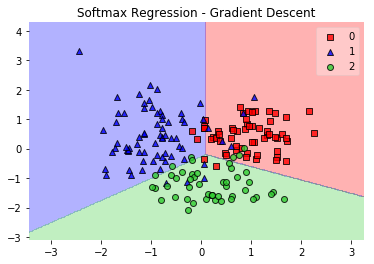

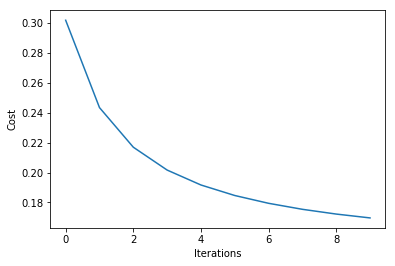

In [13]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Using data from the Wine database
X, y = wine_X, wine_y
X = X[:, [0, 10]] # alcohol and hue

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

lr = SoftmaxRegression(eta=0.01, epochs=10, minibatches=1, random_seed=0)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Gradient Descent')
plt.show()

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

By observing the last diagram, we can see that there is still room for improvement, as the line is not flat yet.

Continue training for another 800 epochs by calling the `fit` method with `init_params=False`.

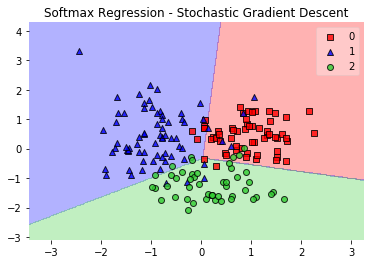

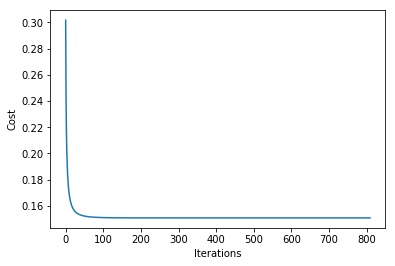

In [14]:
lr.epochs = 800

lr.fit(X, y, init_params=False)

plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Stochastic Gradient Descent')
plt.show()

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

After $ \approx 200$ iterations, the cost seems to stabilize to a constant value (which is $\approx 0.14$). Following iterations do not gives us better results.

### Predicting Class Labels

Let's predict the class labels for the last 3 samples of this dataset:

In [15]:
y_pred = lr.predict(X)
print('Last 3 Class Labels: %s' % y_pred[-3:])

Last 3 Class Labels: [2 2 2]


### Predicting Class Probabilities

And the respective probabilities for each class:

In [16]:
y_pred = lr.predict_proba(X)
print('Last 3 Class Labels:\n %s' % y_pred[-3:])

Last 3 Class Labels:
 [[  4.31143690e-03   8.62636133e-04   9.94825927e-01]
 [  4.60435360e-03   1.55713579e-03   9.93838511e-01]
 [  1.90068835e-02   4.83240216e-05   9.80944792e-01]]


The probability for the 3rd class is almost close to 1, so we are very confident with this prediction.

## Example 2 - Stochastic Gradient Descent

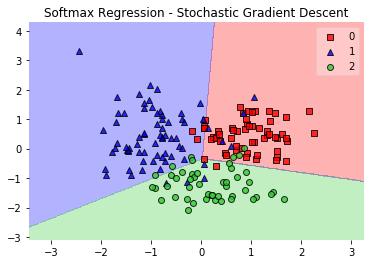

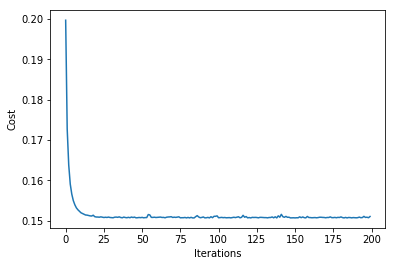

In [17]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import SoftmaxRegression
import matplotlib.pyplot as plt

# Using data from the Wine database
X, y = wine_X, wine_y
X = X[:, [0, 10]] # alcohol and hue

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

lr = SoftmaxRegression(eta=0.05, epochs=200, minibatches=len(y), random_seed=0)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Stochastic Gradient Descent')
plt.show()

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Because of the use of *minibatches*, we train our model with fewer iterations. Although each iteration is more expensive, so the difference between the two training times is small.